In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy import stats
from math import sqrt, log, exp, pi
from random import uniform
from sklearn.datasets import make_blobs
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

In [2]:
mean_1 = 13
mean_2 = 12
std_1 = 0.5
std_2 = 0.7
sample_1 = np.random.normal(mean_1, std_1, 8000)
sample_2 = np.random.normal(mean_2, std_2, 5000)

In [3]:
data = np.concatenate((sample_1, sample_2), axis = None)
data

array([12.00045428, 14.04942375, 12.9763089 , ..., 12.74177855,
       10.89283465, 11.9469169 ])

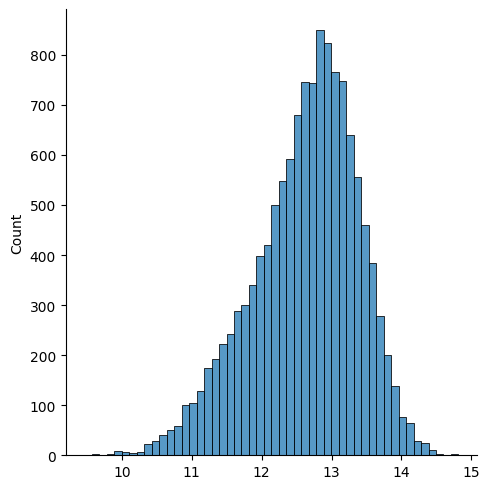

In [4]:
min_value = min(data)
max_value = max(data)
distribution = np.linspace(min_value, max_value, 14000)
sns.displot(data, bins = 50, kde = False)

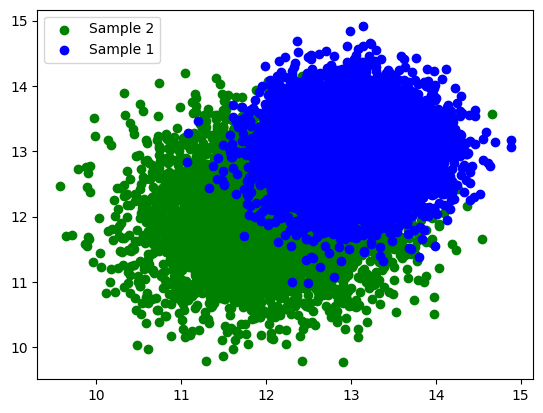

In [5]:
X1, y1 = make_blobs(n_samples = 8000, centers=1, cluster_std=0.5, center_box=(13,13))
X2, y2 = make_blobs(n_samples = 5000, centers=1, cluster_std=0.7, center_box=(12,12))
plt.scatter(X2[:, 0], X2[:, 1], color='green', label='Sample 2')
plt.scatter(X1[:, 0], X1[:, 1], color='blue', label='Sample 1')
plt.legend()
plt.show()

In [6]:
gaus_model = GaussianMixture(n_components=2).fit(data.reshape(-1, 1))
gaus_model.get_params()

{'covariance_type': 'full',
 'init_params': 'kmeans',
 'max_iter': 100,
 'means_init': None,
 'n_components': 2,
 'n_init': 1,
 'precisions_init': None,
 'random_state': None,
 'reg_covar': 1e-06,
 'tol': 0.001,
 'verbose': 0,
 'verbose_interval': 10,
 'warm_start': False,
 'weights_init': None}

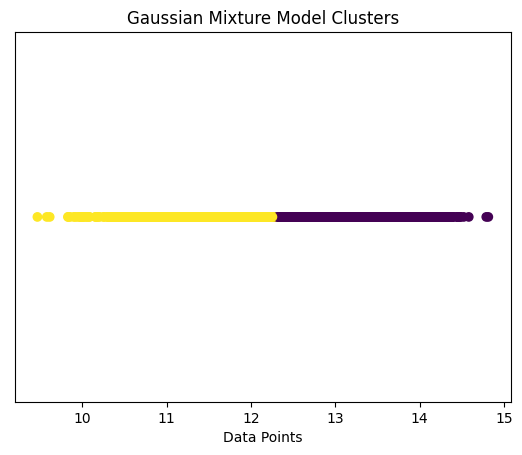

In [7]:
plt.scatter(data, np.zeros_like(data), c=gaus_model.predict(data.reshape(-1, 1)), cmap='viridis')
plt.title("Gaussian Mixture Model Clusters")
plt.xlabel("Data Points")
plt.yticks([])
plt.show()

In [8]:
pred = gaus_model.predict(data.reshape(-1, 1))

In [9]:
silhouette_score_val = silhouette_score(data.reshape(-1, 1), gaus_model.predict(data.reshape(-1, 1)))
calinski_harabasz_score_val = calinski_harabasz_score(data.reshape(-1, 1), gaus_model.predict(data.reshape(-1, 1)))
davies_bouldin_score_val = davies_bouldin_score(data.reshape(-1, 1), gaus_model.predict(data.reshape(-1, 1)))

In [10]:
print("Silhouette Score:", silhouette_score_val)
print("Calinski-Harabasz Score:", calinski_harabasz_score_val)
print("Davies-Bouldin Score:", davies_bouldin_score_val)

Silhouette Score: 0.5824150033164749
Calinski-Harabasz Score: 23426.322480465285
Davies-Bouldin Score: 0.5594126788759498
